**Topic**: Problem set 2 IO. 
**Author**: Jordi Torres-Vallverdú
**Date**: 13/01/2026
**Description**: This codes estimates the exercise 2 of the second problem set in IO. 

In [38]:
using StatFiles, DataFrames

#Input path
data_path = "/Users/jorditorresvallverdu/Library/Mobile Documents/com~apple~CloudDocs/tse/year2/term1/io/part2/jiadata.dta" ##-->CHANGE JUST THIS PART MANUALLY!

#Output path
export_dir = "/Users/jorditorresvallverdu/Documents/GitHub/TSE-2025-2026/IO/" ##Change this manually too

main = DataFrame(load(data_path))


Row,county,population,spc,urban,midwest,dbenton,southern,kmart,walmart,smallstores,dkmart,dwmart,x1,x2,x3,count0,count1,count2,nfirms
,Int16?,Float32?,Float32?,Float32?,Int8?,Float32?,Int8?,Int8?,Int8?,Int8?,Float32?,Float32?,Int8?,Float32?,Float32?,Int8?,Int8?,Int8?,Int8?
1,1,3.72,8.62,0.55,0,6.23,1,1,1,5,0.03,0.03,0,0.03,0.14,0,0,1,2
2,3,3.29,8.24,0.29,0,6.39,1,0,1,6,0.02,0.02,1,0.06,0.14,0,1,0,1
3,4,2.93,7.86,0.19,0,6.15,1,0,1,1,0.09,0.09,1,0.05,0.08,0,1,0,1
4,5,3.8,7.94,0.09,0,6.14,1,0,1,6,0.24,0.26,1,0.04,0.02,0,1,0,1
5,6,2.43,7.71,0.35,0,6.34,1,0,0,3,0.06,0.06,0,0.05,0.21,1,0,0,0
6,7,3.08,8.33,0.25,0,6.29,1,0,1,6,0.02,0.02,1,0.02,0.12,0,1,0,1
7,9,3.6,8.21,0.5,0,6.32,1,0,1,5,0.11,0.11,1,0.07,0.19,0,1,0,1
8,10,3.07,8.18,0.0,0,6.24,1,1,0,6,0.14,0.14,0,0.16,0.24,0,1,0,1
9,11,3.59,8.35,0.12,0,6.2,1,0,1,7,0.03,0.05,1,0.07,0.14,0,1,0,1


**Writing the inequalities**

It is quite simple to formulate the problem. As discussed above, 1,1 and 0,0 are not problematic. For these two we have these moments. 

1. (1,1) $\rightarrow$ $\mathbf{P}(\epsilon_{1}\geq -\pi_{1}^{D},\epsilon_{2}\geq -\pi_{2}^{D}, \rho )= \hat{P_{1,1}} \rightarrow M_1= \hat{P_{1,1}} -\mathbf{P}(\epsilon_{1}\geq -\pi_{1}^{D},\epsilon_{2}\geq -\pi_{2}^{D}, \rho )=0 $
2. (0,0) $\rightarrow$ $\mathbf{P}(\epsilon_{1}\leq -\pi_{1}^{M},\epsilon_{2}\leq -\pi_{2}^{M}, \rho )= \hat{P_{0,0}} \rightarrow M_2= \hat{P_{0,0}}- \mathbf{P}(\epsilon_{1}\leq -\pi_{1}^{M},\epsilon_{2}\leq -\pi_{2}^{M}, \rho )=0$

Here hat indicates that those are probabilities estimated with the observed data. This gives us two 4 moment inequalities (**Can we treat it as two equalities and that is all?**). 

Now let's consider the problematic cases (1,0), (0,1). For these, we have already shown that $P_{0,1}$ or $P_{1,0}$ can not be point identified in the data -unless we make assumptions on who moves first etc (as done above) because there is a region of multiplicity where multiple equilibria can rationalize the data. 

However, these probabilities are not devoid of empirical content. Let's take (1,0). We know that the probability we estimate in the data $\hat{P_{0,1}}$ will be bounded between: 

$P_{0,1}^{l} \leq \hat{P_{0,1}} \leq P_{0,1}^{u}  $, where the lower bound is just the region where 0,1 is equilibrium not in multiplicity. The upper bound is the opposite: the region when we assume the selection function of the multiplicity area always selects this outcome. This gives us two inequalities: 

1. $P_{0,1}^{l} \leq \hat{P_{0,1}} \rightarrow M_3= \hat{P_{0,1}}- P_{0,1}^{l} \geq 0 $
2. $\hat{P_{0,1}} \leq P_{0,1}^{u} \rightarrow M_4= P_{0,1}^{u} - \hat{P_{0,1}}  \geq 0$

Same exercise we can do with $P_{1,0}$. This leads with 8 moments, 2 equalities (4 inequalities) and 4 inequalities. 

----
If we pile up the moments into a vector $M(y; \theta)$, then we need to find values of the parameters that satisfy the six (in)equalities. Parameters that minimize the following function. To do this, without getting into inference, we can use different objective functions used in the literature. 

$$
Q(\theta)= \sum_{m} M(1,1; \theta)_m + M(0,0; \theta)_m + (M(0,1; \theta)_m^{u})_{+} + (M(0,1; \theta)_m^{l})_{-}  + (M(1,0; \theta)_m^{u})_{+} + (M(1,0; \theta)_m^{l})_{-}
$$


---
Related issue is that these moment inequalities are conditional on X. That is:

1. $ P(0,1|X)^{u} \leq P(0,1|X) \leq P(0,1|X)^{b} $


We follow Ciliberto/Tamer and we discritize the support of X/Z. 


In [39]:
main

names(main)


19-element Vector{String}:
 "county"
 "population"
 "spc"
 "urban"
 "midwest"
 "dbenton"
 "southern"
 "kmart"
 "walmart"
 "smallstores"
 "dkmart"
 "dwmart"
 "x1"
 "x2"
 "x3"
 "count0"
 "count1"
 "count2"
 "nfirms"

In [40]:
using Statistics, GaussianDistributions, Distributions, MvNormalCDF



function binormal(a, b, rho; m=5000)
    Σ = [1.0 rho; rho 1.0]
    d = MvNormal([0.0, 0.0], Σ)
    p, err = mvnormcdf(d, [-Inf, -Inf], [a, b]; m=m)
    return p
end


function compute_probs(piw, pik, piduow, piduok, rho)
    p11_s= 1- (binormal(-piduow, Inf, rho)) - (binormal(-piduow, -piduok, rho)) - (binormal(Inf, -piduok, rho)) 
    p00_s= (binormal(-piw, -pik, rho))
    p10_u_s= (binormal(Inf, -piduok, rho))- (binormal(-piw, -piduok, rho))
    p10_l_s= 1- (binormal(-piduow, -pik, rho))- p00_s - p11_s
    p01_u_s= (binormal(-piduow, Inf, rho))- (binormal(-piduow, -pik, rho))
    p01_l_s= 1- (binormal(-piw, -piduok, rho))- p00_s - p11_s

    return p11_s, p00_s, p10_u_s, p10_l_s, p01_u_s, p01_l_s
end 


function compute_moments(p11_s, p00_s, p10_u_s, p10_l_s, p01_u_s, p01_l_s, p11, p00, p01, p10)

    m1= p00 - p00_s
    m2= p11- p11_s
    m3= p01 - p01_l_s #we penalize negative deviations here
    m4= p01 - p01_h_s #we penalize positive deviations here 
    m5= p10 - p10_l_s #penalize negative deviations
    m6= p01 - p01_h_s #we penalize positive deviations here 

    m= hcat(m1, 
        m2, 
        m3, 
        m4, 
        m5,
        m6
    )
    return m1, m2, m3, m4, m5, m6, m
end 


function compute_objective(m1, m2, m3, m4, m5, m6)
    Q= m1 + m2 + minimum(0,m3) + maximum(0,m4) + minimum(0,m5) + maximum(0,m6) #revise this, but seems quite accurate so far. 
    return Q
end 

compute_objective (generic function with 1 method)

In [41]:
using DataFrames, CategoricalArrays, Statistics, StatsBase, ShiftedArrays

main2 = deepcopy(main)

main2.joint_entry = string.(main2.kmart, ",", main2.walmart)

#discretization function
function discretize_bin_value(x; probs = [0.0, 0.5, 1.0], rep = :mean)
    breaks = quantile(skipmissing(x), probs)
    xc = cut(x, breaks; extend=true)
    bin = Int.(levelcode.(xc))

    vals = similar(bin, Float64)
    for k in unique(bin)
        idx = bin .== k
        if rep == :mean
            vals[idx] .= mean(skipmissing(x[idx]))
        elseif rep == :median
            vals[idx] .= median(skipmissing(x[idx]))
        elseif rep == :midpoint
            vals[idx] .= (breaks[k] + breaks[k+1]) / 2
        else
            error("rep must be :mean, :median, or :midpoint") #explicitly used IA to code all the possibilities; make it general. 
        end
    end
    return bin, vals
end

#discretize X's
Xs = [:dbenton, :spc, :population, :urban]

for x in Xs
    bin, val = discretize_bin_value(main2[!, x])
    main2[!, Symbol(x, "_bin")] = bin
    main2[!, Symbol(x, "_val")] = val
end


# market_type + market_id 
main2.market_type = tuple.(
    main2.dbenton_bin,
    main2.spc_bin,
    main2.population_bin,
    main2.urban_bin,
    main2.southern,
    main2.midwest
)

main2.market_id = groupindices(groupby(main2, :market_type)) #key merge variable, a market is defined by a given combination of X,Z

#counts and probabilities by market_id and outcome
freq = combine(groupby(main2, [:market_id, :joint_entry]), nrow => :n)

#add N without join
freq = transform(groupby(freq, :market_id), :n => sum => :N)
freq.p_hat = freq.n ./ freq.N

#reshape to wide; we want 4 probs per market
wide = unstack(freq[:, [:market_id, :joint_entry, :p_hat]], :market_id, :joint_entry, :p_hat)

#fill missing outcomes with 0
for col in names(wide)
    col == :market_id && continue
    wide[!, col] = coalesce.(wide[!, col], 0.0)
end

# rename outcome columns (only if they exist)
rename_map = Dict("0,0"=>:p00, "0,1"=>:p01, "1,0"=>:p10, "1,1"=>:p11)
for (k,v) in rename_map
    if k in names(wide)
        rename!(wide, k => v)
    else
        wide[!, v] = 0.0
    end
end

# add N without join
Ntab = unique(freq[:, [:market_id, :N]])
Ndict = Dict(zip(Ntab.market_id, Ntab.N))
wide.N = [Ndict[id] for id in wide.market_id]

# representative covariates: one row per market_id
Xrep = combine(
    groupby(main2, :market_id),
    :dbenton_val     => first => :dbenton,
    :spc_val         => first => :spc,
    :population_val  => first => :population,
    :urban_val       => first => :urban,
    :southern        => first => :southern,
    :midwest         => first => :midwest
)

# final dataset for objective
cell_data = leftjoin(wide, Xrep, on = :market_id)

# sanity checks
@assert all(abs.(cell_data.p00 + cell_data.p01 + cell_data.p10 + cell_data.p11 .- 1) .< 1e-8)
@assert all(cell_data.N .> 0)

cell_data


Row,market_id,p11,p01,p00,p10,N,dbenton,spc,population,urban,southern,midwest
,Int64,Float64,Float64,Float64,Float64,Int64,Float64?,Float64?,Float64?,Float64?,Int8?,Int8?
1,1,0.367521,0.623932,0.0,0.00854701,117,5.76557,8.55372,3.5385,0.525761,1,0
2,2,0.0,0.413793,0.586207,0.0,58,6.70821,7.85072,3.5385,0.126475,1,0
3,3,0.0,0.201183,0.798817,0.0,169,5.76557,7.85072,2.41122,0.126475,1,0
4,4,0.0307692,0.830769,0.107692,0.0307692,65,5.76557,7.85072,3.5385,0.126475,1,0
5,5,0.0,0.162791,0.837209,0.0,43,6.70821,7.85072,2.41122,0.525761,1,0
6,6,0.133333,0.822222,0.0444444,0.0,45,5.76557,8.55372,3.5385,0.126475,1,0
7,7,0.211538,0.519231,0.230769,0.0384615,52,6.70821,7.85072,3.5385,0.525761,1,0
8,8,0.534091,0.363636,0.0340909,0.0681818,88,6.70821,8.55372,3.5385,0.525761,1,0
9,9,0.347826,0.456522,0.108696,0.0869565,46,6.70821,8.55372,3.5385,0.126475,1,0


In [79]:
function Q_theta(cell, theta)

    β_pop, β_spc, β_urban, βw_dbenton, βw_southern, βk_midwest, γ_comp_w, γ_comp_k, rho, α_k, α_w = theta # parameters to estimate

    Ntot = sum(cell.N)
    Q = 0.0

        for r in eachrow(cell)
            pop = r.population; 
            spc = r.spc; 
            urban = r.urban; 
            db = r.dbenton
            south = r.southern;
            mid = r.midwest

            piw    = α_w + β_pop*pop + β_spc*spc + β_urban*urban + βw_dbenton*db + βw_southern*south + γ_comp_w
            pik    = α_k + β_pop*pop + β_spc*spc + β_urban*urban + βk_midwest*mid + γ_comp_k
            piduow = α_w + β_pop*pop + β_spc*spc + β_urban*urban + βw_dbenton*db + βw_southern*south
            piduok =α_k + β_pop*pop + β_spc*spc + β_urban*urban + βk_midwest*mid

            p11, p00, p10_L, p10_U, p01_L, p01_U = compute_probs(piw, pik, piduow, piduok, rho)

            p11_hat = r.p11 ; 
            p00_hat = r.p00 ; 
            p10_hat = r.p10 ; 
            p01_hat = r.p01 ;




            viol = abs(p00_hat - p00) + abs(p11_hat - p11) + 
                max(0, p01_L - p01_hat) + max(0, p01_hat - p01_U) +
                max(0, p10_L - p10_hat) + max(0, p10_hat - p10_U)

            w = r.N / Ntot #integrating out the X
            Q += w * viol
        end
        
    return Q
end



Q_theta (generic function with 1 method)

In [80]:
#define a grid and then run for the grid. 

using Distributions

R = 2000

θ = hcat(
    rand(Uniform(1.4, 2.0), R), #β_pop
    rand(Uniform(1.1, 2.0), R), #β_spc
    rand(Uniform(1.0, 2.0), R), #β_urban
    rand(Uniform(-1.2, -0.8), R), #βw_dbenton
    rand(Uniform(0.3, 0.7), R), #βw_southern
    rand(Uniform(0.1, 0.5), R), #βk_midwest
    rand(Uniform(-3.0, -0.5), R), #γ_comp
    rand(Uniform(-3.0, -0.5), R), #γ_comp
    rand(Uniform(-1, 1), R), #rho
    rand(Uniform(-50, -5), R), #alpha_k
    rand(Uniform(-50, -5), R) #alpha_w
)





2000×11 Matrix{Float64}:
 1.92574  1.76652  1.32335  -0.905595  …   0.461346   -29.8334   -32.5194
 1.60551  1.15761  1.11029  -1.14655       0.180508   -26.1344    -5.29567
 1.88841  1.98262  1.91275  -0.915736      0.145667   -34.4937   -35.2287
 1.41567  1.99855  1.38095  -1.19729       0.966843   -37.7164   -39.7599
 1.99078  1.5918   1.31057  -1.01775      -0.373784   -37.02     -11.4761
 1.42417  1.12376  1.06205  -1.00123   …   0.806723   -16.265    -10.3966
 1.95253  1.28067  1.8896   -1.17805      -0.644345   -37.3109   -14.6176
 1.69074  1.75564  1.03281  -1.08663      -0.704458   -11.9558   -11.2931
 1.9803   1.36534  1.32279  -1.17887      -0.0255311  -37.9331   -13.3269
 1.64825  1.70664  1.51947  -0.900093      0.893534   -44.0659   -37.14
 ⋮                                     ⋱                           ⋮
 1.98089  1.35179  1.88241  -1.03395      -0.462278   -41.023    -32.3022
 1.59288  1.84686  1.72107  -1.03389       0.0334574  -29.6678    -5.32833
 1.99975  1.26679 

In [81]:
Qvals = [Q_theta(cell_data, θ[r, :]) for r in 1:size(θ,1)]


2000-element Vector{Float64}:
 2.6658595641643776
 1.057233018557662
 2.665859564164648
 2.665859564164648
 1.1993319264628088
 2.481745631039589
 2.662963065975912
 1.6147665855773516
 2.5801984458225067
 2.665859564164648
 ⋮
 2.665859564164648
 1.5622268015787553
 2.665859564164648
 2.665859564164648
 1.2769975785881995
 1.276997549148206
 1.0646366592899017
 2.665859564164648
 2.665859564164648

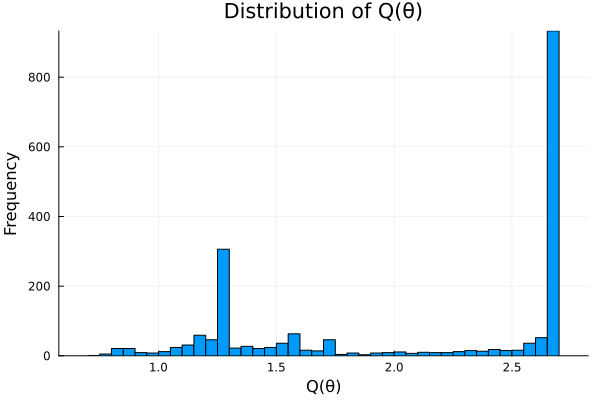

In [82]:
#add distribituion

using Plots

histogram(Qvals;
    bins = 50,
    xlabel = "Q(θ)",
    ylabel = "Frequency",
    title = "Distribution of Q(θ)",
    legend = false
)
